<a href="https://colab.research.google.com/github/aswin-ar3669/RLA-Python-Learning/blob/main/RLA_Unit_1_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Function to initialize the board
def initialize_board():
    return [[" " for _ in range(3)] for _ in range(3)]

# Function to display the board # Displays the current state of the board in a visually appealing format
def display_board(board):
    print("\n")
    for row in board:
        print(" | ".join(row))
        print("-" * 5)
    print("\n")

# Function to check if a move is valid
def is_valid_move(board, row, col):
    return 0 <= row < 3 and 0 <= col < 3 and board[row][col] == " "

# Function to check for a win
def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or \
           all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or \
       all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

# Function to check for a draw
def is_draw(board):
    return all(board[row][col] != " " for row in range(3) for col in range(3))

# Main function to play the game
def play_game():
    print("Welcome to Tic-Tac-Toe!")
    board = initialize_board()
    current_player = "X"

    while True:
        display_board(board)
        print(f"Player {current_player}'s turn")

        # Get user input
        try:
            row, col = map(int, input("Enter row and column (0, 1, or 2) separated by space: ").split())
            if not is_valid_move(board, row, col):
                print("Invalid move! Try again.")
                continue
        except ValueError:
            print("Invalid input! Please enter two integers separated by space.")
            continue

        # Make the move
        board[row][col] = current_player

        # Check for a win or draw
        if check_winner(board, current_player):
            display_board(board)
            print(f"Player {current_player} wins!")
            break
        if is_draw(board):
            display_board(board)
            print("It's a draw!")
            break

        # Switch players
        current_player = "O" if current_player == "X" else "X"

# Run the game
if __name__ == "__main__":
    play_game()


Welcome to Tic-Tac-Toe!


  |   |  
-----
  |   |  
-----
  |   |  
-----


Player X's turn
Enter row and column (0, 1, or 2) separated by space: 1 1


  |   |  
-----
  | X |  
-----
  |   |  
-----


Player O's turn
Enter row and column (0, 1, or 2) separated by space: 1 0


  |   |  
-----
O | X |  
-----
  |   |  
-----


Player X's turn
Enter row and column (0, 1, or 2) separated by space: 2 1


  |   |  
-----
O | X |  
-----
  | X |  
-----


Player O's turn
Enter row and column (0, 1, or 2) separated by space: 0 1


  | O |  
-----
O | X |  
-----
  | X |  
-----


Player X's turn
Enter row and column (0, 1, or 2) separated by space: 0 0


X | O |  
-----
O | X |  
-----
  | X |  
-----


Player O's turn
Enter row and column (0, 1, or 2) separated by space: 2 2


X | O |  
-----
O | X |  
-----
  | X | O
-----


Player X's turn
Enter row and column (0, 1, or 2) separated by space: 2 0


X | O |  
-----
O | X |  
-----
X | X | O
-----


Player O's turn
Enter row and column (0, 1

In [ ]:
import numpy as np
import random

class TicTacToeRL:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)  # 0 for empty, 1 for X, -1 for O
        self.state_values = {}  # State-value function
        self.alpha = 0.2  # Learning rate
        self.epsilon = 0.2  # Exploration probability

    def reset(self):
        self.board = np.zeros((3, 3), dtype=int)

    def get_state(self):
        """Returns a tuple representation of the current board."""
        return tuple(self.board.flatten())

    def is_winner(self, player):
        """Checks if a player has won."""
        for i in range(3):
            if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                return True
        if np.all(np.diag(self.board) == player) or np.all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False

    def is_draw(self):
        """Checks if the game is a draw."""
        return not np.any(self.board == 0) and not self.is_winner(1) and not self.is_winner(-1)

    def available_moves(self):
        """Returns a list of available moves."""
        return [(i, j) for i in range(3) for j in range(3) if self.board[i, j] == 0]

    def make_move(self, move, player):
        """Makes a move on the board."""
        self.board[move] = player

    def get_value(self, state):
        """Returns the value of a state, initializing it if necessary."""
        if state not in self.state_values:
            self.state_values[state] = 0.5  # Initialize to neutral value
        return self.state_values[state]

    def choose_action(self, player):
        """Chooses an action using an epsilon-greedy policy."""
        if random.random() < self.epsilon:
            # Explore: Choose a random move
            return random.choice(self.available_moves())
        else:
            # Exploit: Choose the best move based on the value function
            best_value = -float('inf') if player == 1 else float('inf')
            best_move = None
            for move in self.available_moves():
                self.make_move(move, player)
                state = self.get_state()
                value = self.get_value(state)
                self.make_move(move, 0)  # Undo the move
                if (player == 1 and value > best_value) or (player == -1 and value < best_value):
                    best_value = value
                    best_move = move
            return best_move

    def update_value_function(self, prev_state, next_state, reward):
        """Updates the value function using TD(0)."""
        prev_value = self.get_value(prev_state)
        next_value = self.get_value(next_state)
        self.state_values[prev_state] += self.alpha * (reward + next_value - prev_value)

    def train(self, episodes=5000):
        """Trains the agent by self-play."""
        for _ in range(episodes):
            self.reset()
            states = []
            current_player = 1  # Player 1 starts
            while True:
                current_state = self.get_state()
                states.append(current_state)
                move = self.choose_action(current_player)
                self.make_move(move, current_player)

                if self.is_winner(current_player):
                    reward = 1 if current_player == 1 else -1
                    for state in reversed(states):
                        self.update_value_function(state, self.get_state(), reward)
                        reward = 0  # Propagate rewards only to previous states
                    break
                elif self.is_draw():
                    for state in reversed(states):
                        self.update_value_function(state, self.get_state(), 0)
                    break
                current_player *= -1  # Switch players

    def play(self):
        """Plays a game against the trained agent."""
        self.reset()
        print("You are X (Player 1). Agent is O (Player 2).")
        current_player = 1  # Player 1 starts
        while True:
            print("\nCurrent Board:")
            self.print_board()
            if current_player == 1:
                move = tuple(map(int, input("Enter your move (row and column): ").split()))
                if move not in self.available_moves():
                    print("Invalid move! Try again.")
                    continue
            else:
                print("Agent's turn...")
                move = self.choose_action(current_player)
            self.make_move(move, current_player)
            if self.is_winner(current_player):
                print("\nCurrent Board:")
                self.print_board()
                if current_player == 1:
                    print("Congratulations! You win!")
                else:
                    print("Agent wins! Better luck next time.")
                break
            elif self.is_draw():
                print("\nCurrent Board:")
                self.print_board()
                print("It's a draw!")
                break
            current_player *= -1  # Switch players

    def print_board(self):
        """Prints the current board."""
        symbols = {1: "X", -1: "O", 0: " "}
        for row in self.board:
            print(" | ".join(symbols[cell] for cell in row))
            print("-" * 5)

# Initialize and train the agent
agent = TicTacToeRL()
agent.train(episodes=10000)

# Play a game
agent.play()


You are X (Player 1). Agent is O (Player 2).

Current Board:
  |   |  
-----
  |   |  
-----
  |   |  
-----
Enter your move (row and column): 0 0

Current Board:
X |   |  
-----
  |   |  
-----
  |   |  
-----
Agent's turn...

Current Board:
X | O |  
-----
  |   |  
-----
  |   |  
-----
Enter your move (row and column): 2 2

Current Board:
X | O |  
-----
  |   |  
-----
  |   | X
-----
Agent's turn...

Current Board:
X | O |  
-----
  | O |  
-----
  |   | X
-----
Enter your move (row and column): 2 1

Current Board:
X | O |  
-----
  | O |  
-----
  | X | X
-----
Agent's turn...

Current Board:
X | O |  
-----
  | O |  
-----
O | X | X
-----
Enter your move (row and column): 0 2

Current Board:
X | O | X
-----
  | O |  
-----
O | X | X
-----
Agent's turn...

Current Board:
X | O | X
-----
  | O | O
-----
O | X | X
-----
Enter your move (row and column): 1 0

Current Board:
X | O | X
-----
X | O | O
-----
O | X | X
-----
It's a draw!


Average Reward: [0.03127454 0.25486619 0.44008185 0.53975557 0.60377359 0.63515437
 0.76039087 0.77322409 0.80648202 0.78129318 0.82480891 0.86278737
 0.85367445 0.87605328 0.8765879  0.88666105 0.91201248 0.91200923
 0.88940963 0.92701746 0.93785879 0.95995481 0.98109702 0.96292251
 1.0056056  0.97654185 0.96955009 0.98563178 0.96504006 1.0652315
 1.00236748 1.01634015 1.07395425 1.06171379 1.02914557 1.04690584
 1.02715827 1.04947476 1.0804272  1.02786527 1.03611306 1.07944388
 1.0470947  1.0774235  1.04787649 1.02202555 1.06139485 1.04084492
 1.06891344 1.04213805 1.13184876 1.07706982 1.09475988 1.05508292
 1.06245313 1.07611185 1.09131802 1.06535273 1.10193706 1.1155247
 1.11276681 1.07463742 1.10401884 1.10034298 1.12175122 1.14457512
 1.13543093 1.11826334 1.13711234 1.17333767 1.1880678  1.11806858
 1.1444854  1.14647592 1.14723555 1.13654791 1.16139723 1.11248976
 1.15629804 1.14219137 1.10621166 1.13616353 1.15038529 1.11505433
 1.14809045 1.15337163 1.12347623 1.11439341 1.1

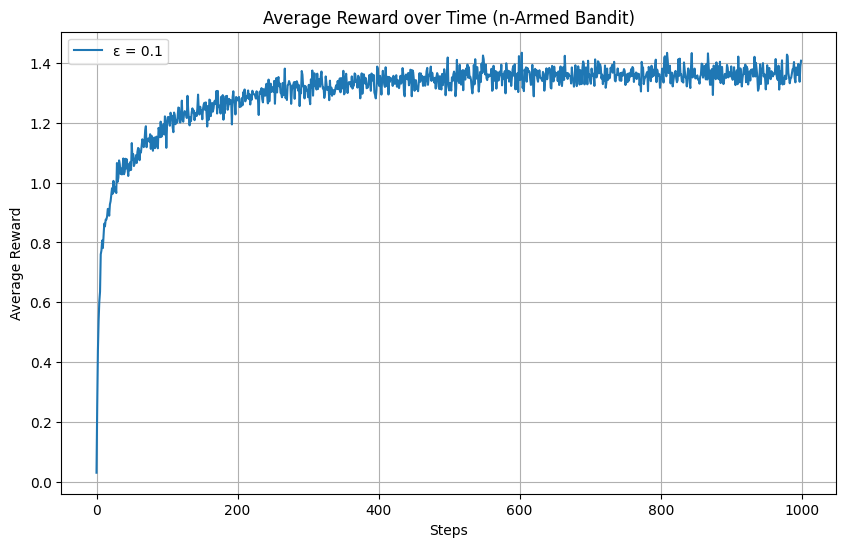

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_actions = 10  # Number of actions (arms)
n_steps = 1000  # Number of time steps
n_runs = 2000   # Number of runs for averaging
epsilon = 0.1   # Probability of exploration

# Function to simulate the n-Armed Bandit Problem
def n_armed_bandit(n_actions, n_steps, epsilon):
    # Initialize results
    average_rewards = np.zeros(n_steps)

    for run in range(n_runs):
        # True action values (stationary)
        true_values = np.random.normal(0, 1, n_actions)
        # Initialize estimates of action values
        q_estimates = np.zeros(n_actions)
        # Initialize action counts
        action_counts = np.zeros(n_actions)
        # Track total rewards for this run
        rewards = np.zeros(n_steps)

        for step in range(n_steps):
            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = np.random.choice(n_actions)  # Explore
            else:
                action = np.argmax(q_estimates)      # Exploit

            # Get reward for chosen action
            reward = np.random.normal(true_values[action], 1)
            rewards[step] = reward

            # Update action counts
            action_counts[action] += 1
            # Update Q estimate using incremental formula
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

        # Add rewards of this run to total
        average_rewards += rewards

    # Average rewards over all runs
    average_rewards /= n_runs
    return average_rewards

# Run the simulation
average_rewards = n_armed_bandit(n_actions, n_steps, epsilon)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(average_rewards, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
print("Average Reward:", average_rewards)
plt.title("Average Reward over Time (n-Armed Bandit)")
plt.legend()
plt.grid()
plt.show()


Average Reward: {0: array([-0.00544326,  0.1213242 ,  0.23003932,  0.30303176,  0.37325059,
        0.43247124,  0.47255913,  0.51335762,  0.54512277,  0.57693145,
        0.60781966,  0.63410451,  0.65381929,  0.67339377,  0.68975159,
        0.70393953,  0.71593216,  0.72739443,  0.74019121,  0.75163626,
        0.76135699,  0.76875587,  0.77734632,  0.78520991,  0.79331827,
        0.80108974,  0.80782489,  0.81503204,  0.82186236,  0.82814021,
        0.83353142,  0.83886328,  0.84409104,  0.84822509,  0.85185106,
        0.85662292,  0.86040341,  0.86365454,  0.86765711,  0.87119887,
        0.87451017,  0.87714001,  0.87936668,  0.88287913,  0.88550417,
        0.88879679,  0.89191248,  0.89410988,  0.89666094,  0.89836421,
        0.9012455 ,  0.90362924,  0.90559396,  0.90740457,  0.90917163,
        0.91093894,  0.91329695,  0.91477236,  0.91681804,  0.91898861,
        0.9210698 ,  0.9227334 ,  0.92456871,  0.92628148,  0.92728858,
        0.92862966,  0.93039846,  0.93150266

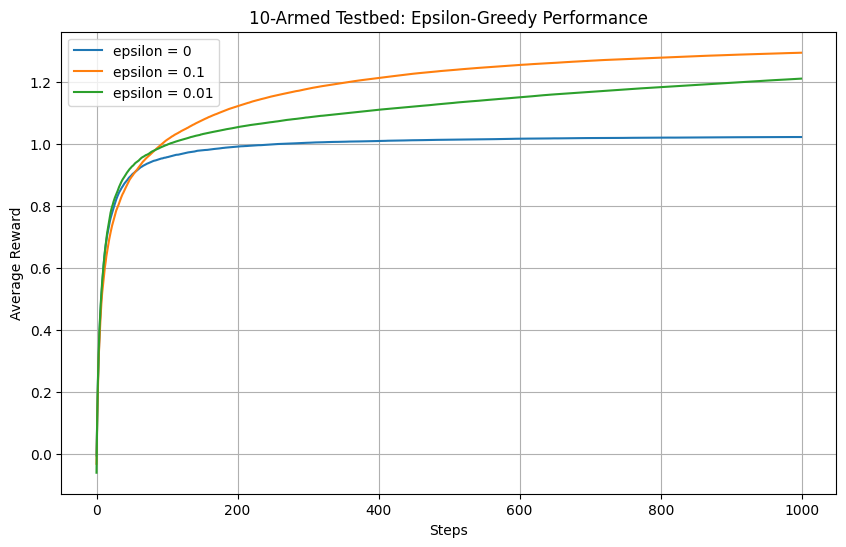

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class TenArmedTestbed:
    def __init__(self, n_arms=10, epsilon=0.1, n_steps=1000):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.n_steps = n_steps
        self.q_true = np.random.randn(n_arms)  # True action values (mean rewards)
        self.q_estimates = np.zeros(n_arms)   # Estimated action values
        self.action_counts = np.zeros(n_arms)  # Number of times each arm is chosen
        self.rewards = []                     # Record of rewards

    def select_action(self):
        """Choose an action using epsilon-greedy strategy."""
        if np.random.rand() < self.epsilon:  # Exploration
            return np.random.randint(self.n_arms)
        else:  # Exploitation
            return np.argmax(self.q_estimates)

    def step(self, action):
        """Generate a reward for the chosen action."""
        reward = np.random.randn() + self.q_true[action]  # Gaussian reward centered at q_true[action]
        return reward

    def update_estimates(self, action, reward):
        """Update the action-value estimates using incremental mean."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_estimates[action] += (1 / n) * (reward - self.q_estimates[action])

    def run(self):
        """Run the 10-armed testbed simulation."""
        for _ in range(self.n_steps):
            action = self.select_action()
            reward = self.step(action)
            self.update_estimates(action, reward)
            self.rewards.append(reward)

        return np.cumsum(self.rewards) / np.arange(1, self.n_steps + 1)  # Average reward over time


def simulate_testbed(epsilon_values, n_arms=10, n_steps=1000, n_runs=2000):
    """Simulate the 10-armed testbed for different epsilon values."""
    avg_rewards = {}

    for epsilon in epsilon_values:
        all_rewards = np.zeros(n_steps)
        for _ in range(n_runs):
            testbed = TenArmedTestbed(n_arms=n_arms, epsilon=epsilon, n_steps=n_steps)
            rewards = testbed.run()
            all_rewards += rewards
        avg_rewards[epsilon] = all_rewards / n_runs

    return avg_rewards


# Simulate the 10-armed testbed for different epsilon values
epsilons = [0, 0.1, 0.01]
avg_rewards = simulate_testbed(epsilons)

# Plot the results
plt.figure(figsize=(10, 6))
for epsilon, rewards in avg_rewards.items():
    plt.plot(rewards, label=f"epsilon = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
print("Average Reward:", avg_rewards)
plt.title("10-Armed Testbed: Epsilon-Greedy Performance")
plt.legend()
plt.grid()
plt.show()

Average Reward: {0.1: array([ 7.09930412e-03, -7.01603335e-05,  1.98389559e-03,  3.00581647e-03,
       -4.67021934e-03, -7.27051224e-03, -4.49430173e-03, -1.10185451e-02,
       -1.27839835e-02, -1.31573899e-02,  9.15468962e-02,  1.78160077e-01,
        2.53831745e-01,  3.21570382e-01,  3.82399905e-01,  4.35386427e-01,
        4.83805841e-01,  5.28138527e-01,  5.70806651e-01,  6.09222890e-01,
        6.43955383e-01,  6.73816200e-01,  7.00887051e-01,  7.27606634e-01,
        7.52034679e-01,  7.76504200e-01,  7.99381955e-01,  8.18446653e-01,
        8.38268818e-01,  8.56979804e-01,  8.74031732e-01,  8.90018106e-01,
        9.05580183e-01,  9.18766881e-01,  9.32957015e-01,  9.46165813e-01,
        9.58176907e-01,  9.69694619e-01,  9.80608201e-01,  9.91538707e-01,
        1.00067575e+00,  1.00989235e+00,  1.01829839e+00,  1.02721074e+00,
        1.03559860e+00,  1.04357178e+00,  1.05222103e+00,  1.05980784e+00,
        1.06646357e+00,  1.07363577e+00,  1.08033252e+00,  1.08697410e+00,
   

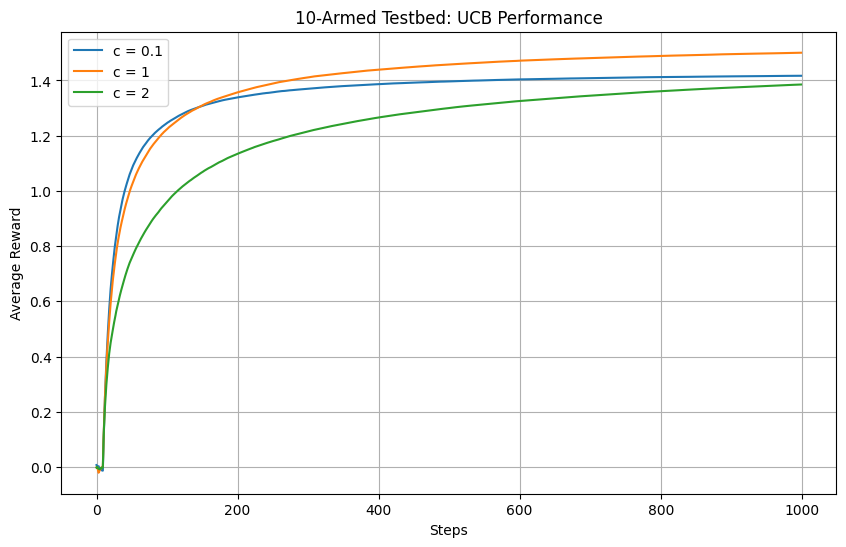

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class UCB:
    def __init__(self, n_arms, c, n_steps):
        self.n_arms = n_arms
        self.c = c
        self.n_steps = n_steps
        self.q_true = np.random.randn(n_arms)  # True action values
        self.q_estimates = np.zeros(n_arms)   # Estimated action values
        self.action_counts = np.zeros(n_arms)  # Counts of each arm
        self.total_rewards = []               # Total reward tracker

    def select_action(self, t):
        """Select an action using the UCB formula."""
        if t < self.n_arms:  # Ensure each arm is selected at least once
            return t
        confidence_bounds = self.q_estimates + self.c * np.sqrt(
            np.log(t) / (self.action_counts + 1e-5)  # Add small value to avoid division by zero
        )
        return np.argmax(confidence_bounds)

    def step(self, action):
        """Generate a reward for the chosen action."""
        reward = np.random.randn() + self.q_true[action]  # Reward centered at q_true[action]
        return reward

    def update_estimates(self, action, reward):
        """Update action-value estimates."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        self.q_estimates[action] += (1 / n) * (reward - self.q_estimates[action])

    def run(self):
        """Run the UCB algorithm."""
        for t in range(1, self.n_steps + 1):
            action = self.select_action(t)
            reward = self.step(action)
            self.update_estimates(action, reward)
            self.total_rewards.append(reward)

        return np.cumsum(self.total_rewards) / np.arange(1, self.n_steps + 1)  # Average reward over time

def simulate_ucb(n_arms=10, n_steps=1000, c_values=[0.1, 1, 2], n_runs=2000):
    """Simulate the UCB algorithm for different exploration parameters."""
    avg_rewards = {}

    for c in c_values:
        all_rewards = np.zeros(n_steps)
        for _ in range(n_runs):
            ucb_agent = UCB(n_arms=n_arms, c=c, n_steps=n_steps)
            rewards = ucb_agent.run()
            all_rewards += rewards
        avg_rewards[c] = all_rewards / n_runs

    return avg_rewards

# Simulate UCB for different exploration constants
c_values = [0.1, 1, 2]
avg_rewards = simulate_ucb(c_values=c_values)

# Plot the results
plt.figure(figsize=(10, 6))
for c, rewards in avg_rewards.items():
    plt.plot(rewards, label=f"c = {c}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("10-Armed Testbed: UCB Performance")
print("Average Reward:", avg_rewards)
plt.legend()
plt.grid()
plt.show()


Average Reward: [-0.18921921  0.01456177  0.07339574 -0.0460047  -0.01309349 -0.12904027
  0.06340223  0.15586701 -0.18415156 -0.09772929  1.1565141   0.68458725
  0.60791275  0.25659029  0.25473429  0.13902162 -0.05199444 -0.17987385
 -0.21575402 -0.02615419 -0.05563319  0.26458874  0.39599134  0.47248835
  0.23136556  0.18260795  0.4702163   0.26901923  0.27114418  0.23197647
  0.14030811  0.0788603   0.26364382  0.15975287  0.14747442  0.03990289
  0.20038582  0.29165932  0.31151294  0.23005539  0.17799306  0.33183515
  0.39637264  0.1701119   0.25570021  0.35189675  0.25322424  0.35462643
  0.3301217   0.2040851   0.39491564  0.24123164  0.29281577  0.4217967
  0.22533513  0.22928386  0.50464825  0.50619375  0.46981192  0.40251045
  0.36884442  0.33408392  0.39096703  0.40611148  0.47759678  0.42889617
  0.51495217  0.29581474  0.42192324  0.41941287  0.40189715  0.45879081
  0.27994638  0.56127363  0.40389243  0.37220439  0.59389362  0.53246655
  0.46648446  0.52032467  0.46957819

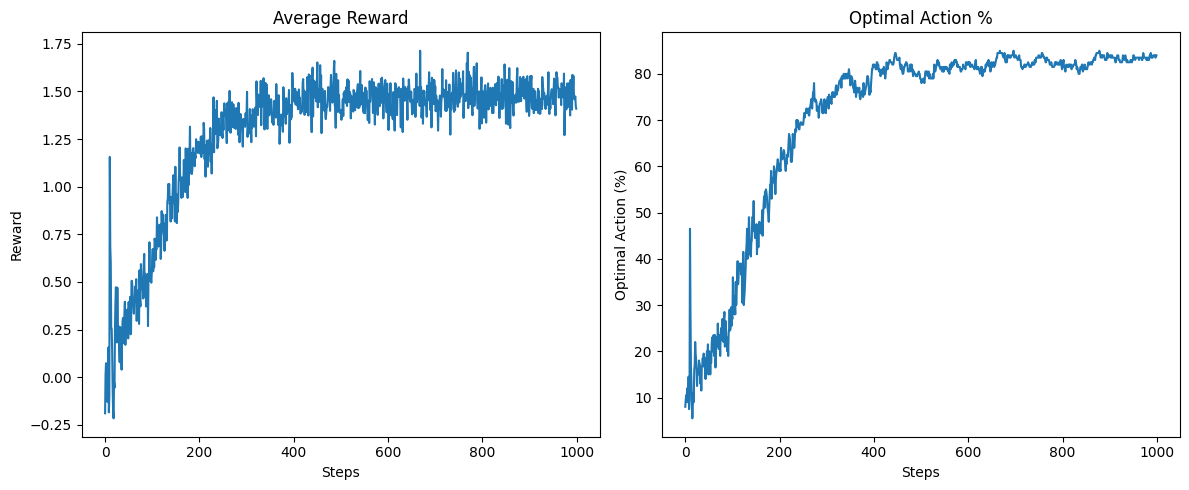

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class BanditEnvironment:
    def __init__(self, k):
        """
        Initializes a k-armed bandit environment with random action values.
        """
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # True action values (stationary)

    def step(self, action):
        """
        Simulates taking an action in the environment.
        Returns a reward sampled from a normal distribution centered at the true action value.
        """
        return np.random.normal(self.q_true[action], 1)

class OptimisticInitialValuesAgent:
    def __init__(self, k, alpha=0.1, initial_value=5.0):
        """
        Initializes the agent.
        - k: Number of actions.
        - alpha: Step size for updating estimates.
        - initial_value: Optimistic initial estimate for action values.
        """
        self.k = k
        self.alpha = alpha
        self.q_estimates = np.full(k, initial_value)  # Optimistic initial estimates
        self.action_counts = np.zeros(k)  # Count of actions taken
        self.total_rewards = 0

    def select_action(self):
        """
        Selects the action with the highest estimated value (greedy).
        """
        return np.argmax(self.q_estimates)

    def update_estimate(self, action, reward):
        """
        Updates the action value estimate using the step-size parameter alpha.
        """
        self.q_estimates[action] += self.alpha * (reward - self.q_estimates[action])
        self.action_counts[action] += 1
        self.total_rewards += reward

def simulate_bandit(k=10, steps=1000, alpha=0.1, initial_value=5.0):
    """
    Simulates the Optimistic Initial Values strategy for a k-armed bandit problem.
    - k: Number of arms.
    - steps: Number of steps in the simulation.
    - alpha: Step size for updating estimates.
    - initial_value: Optimistic initial estimate for action values.
    """
    env = BanditEnvironment(k)
    agent = OptimisticInitialValuesAgent(k, alpha, initial_value)

    rewards = []
    optimal_action_counts = []

    for step in range(steps):
        action = agent.select_action()
        reward = env.step(action)
        agent.update_estimate(action, reward)

        rewards.append(reward)
        optimal_action_counts.append(int(action == np.argmax(env.q_true)))

    return np.array(rewards), np.array(optimal_action_counts)

# Simulation parameters
k = 10
steps = 1000
runs = 200
alpha = 0.1
initial_value = 5.0

# Run multiple simulations and average results
avg_rewards = np.zeros(steps)
avg_optimal_action = np.zeros(steps)

for run in range(runs):
    rewards, optimal_action_counts = simulate_bandit(k, steps, alpha, initial_value)
    avg_rewards += rewards
    avg_optimal_action += optimal_action_counts

avg_rewards /= runs
avg_optimal_action /= runs

# Plotting results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards)
plt.title("Average Reward")
plt.xlabel("Steps")
plt.ylabel("Reward")
print("Average Reward:", avg_rewards)

plt.subplot(1, 2, 2)
plt.plot(avg_optimal_action * 100)
plt.title("Optimal Action %")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")

plt.tight_layout()
plt.show()

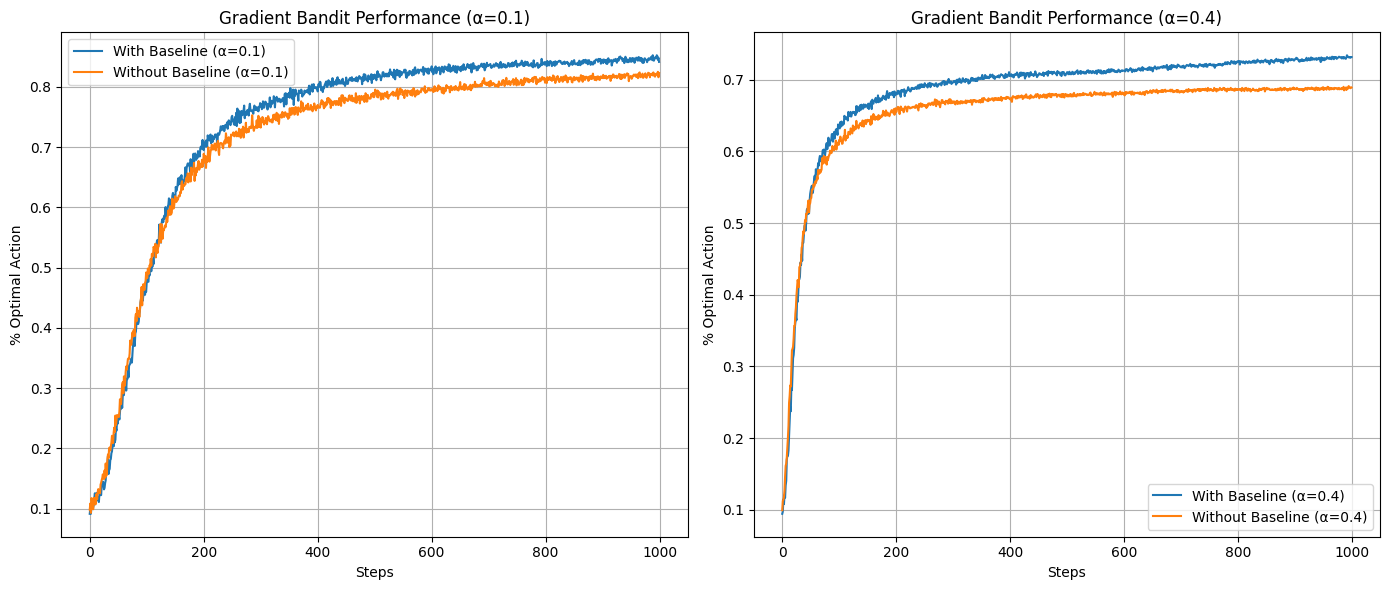

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Bandit Algorithm
def gradient_bandit(n_arms=10, n_steps=1000, n_runs=2000, alpha=0.1, use_baseline=True):
    optimal_action_counts = np.zeros((n_runs, n_steps))
    average_rewards = np.zeros((n_runs, n_steps))

    for run in range(n_runs):
        # Initialize true action values and preferences
        q_true = np.random.normal(0, 1, n_arms)  # True action values
        H = np.zeros(n_arms)  # Preferences
        action_probs = np.zeros(n_arms)  # Action probabilities
        baseline = 0  # Average reward baseline
        N = np.zeros(n_arms)  # Count of actions

        for t in range(n_steps):
            # Compute action probabilities using softmax
            exp_H = np.exp(H - np.max(H))  # For numerical stability
            action_probs = exp_H / np.sum(exp_H)

            # Choose action based on probabilities
            action = np.random.choice(np.arange(n_arms), p=action_probs)

            # Generate reward
            reward = np.random.normal(q_true[action], 1)  # Reward with noise

            # Update average reward baseline
            if use_baseline:
                baseline += (reward - baseline) / (t + 1)

            # Update preferences (gradient ascent)
            for a in range(n_arms):
                if a == action:
                    H[a] += alpha * (reward - (baseline if use_baseline else 0)) * (1 - action_probs[a])
                else:
                    H[a] -= alpha * (reward - (baseline if use_baseline else 0)) * action_probs[a]

            # Track optimal action
            optimal_action = np.argmax(q_true)
            if action == optimal_action:
                optimal_action_counts[run, t] = 1

            # Track rewards
            average_rewards[run, t] = reward

    # Average over runs
    optimal_action_counts = np.mean(optimal_action_counts, axis=0)
    average_rewards = np.mean(average_rewards, axis=0)

    return optimal_action_counts, average_rewards

# Parameters
n_arms = 10
n_steps = 1000
n_runs = 2000

# Run simulations for different alpha values and baselines
alphas = [0.1, 0.4]
results_with_baseline = []
results_without_baseline = []

for alpha in alphas:
    results_with_baseline.append(gradient_bandit(n_arms, n_steps, n_runs, alpha, use_baseline=True))
    results_without_baseline.append(gradient_bandit(n_arms, n_steps, n_runs, alpha, use_baseline=False))

# Plot results
plt.figure(figsize=(14, 6))

for i, alpha in enumerate(alphas):
    plt.subplot(1, 2, i + 1)
    plt.plot(results_with_baseline[i][0], label=f'With Baseline (α={alpha})')
    plt.plot(results_without_baseline[i][0], label=f'Without Baseline (α={alpha})')
    plt.title(f'Gradient Bandit Performance (α={alpha})')
    plt.xlabel('Steps')
    plt.ylabel('% Optimal Action')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
